In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
advertising_data = pd.read_csv("advertising.csv")

# Display the first few rows
print(advertising_data.head())

# Check dataset information
print(advertising_data.info())

# Summary statistics
print(advertising_data.describe())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000

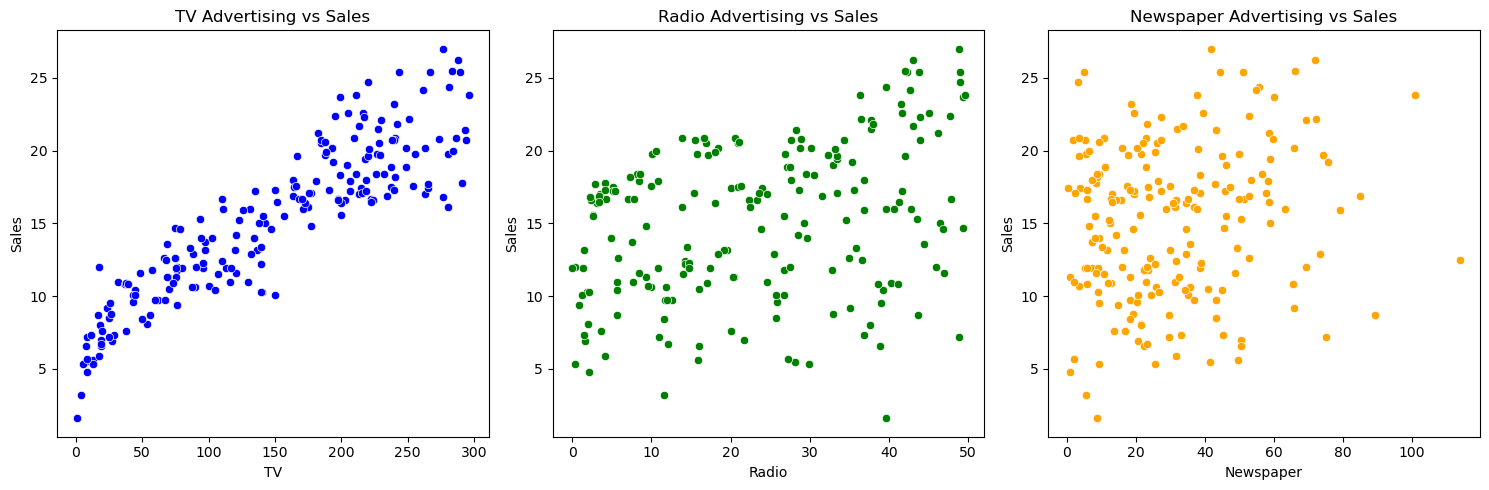

In [3]:
# Visualize relationships between features and sales
plt.figure(figsize=(15, 5))

# Scatter plot for TV vs Sales
plt.subplot(1, 3, 1)
sns.scatterplot(data=advertising_data, x='TV', y='Sales', color='blue')
plt.title('TV Advertising vs Sales')

# Scatter plot for Radio vs Sales
plt.subplot(1, 3, 2)
sns.scatterplot(data=advertising_data, x='Radio', y='Sales', color='green')
plt.title('Radio Advertising vs Sales')

# Scatter plot for Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.scatterplot(data=advertising_data, x='Newspaper', y='Sales', color='orange')
plt.title('Newspaper Advertising vs Sales')

plt.tight_layout()
plt.show()


In [4]:
# Define features (X) and target (y)
X = advertising_data[['TV', 'Radio', 'Newspaper']]
y = advertising_data['Sales']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [6]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 2.91
R-squared: 0.91


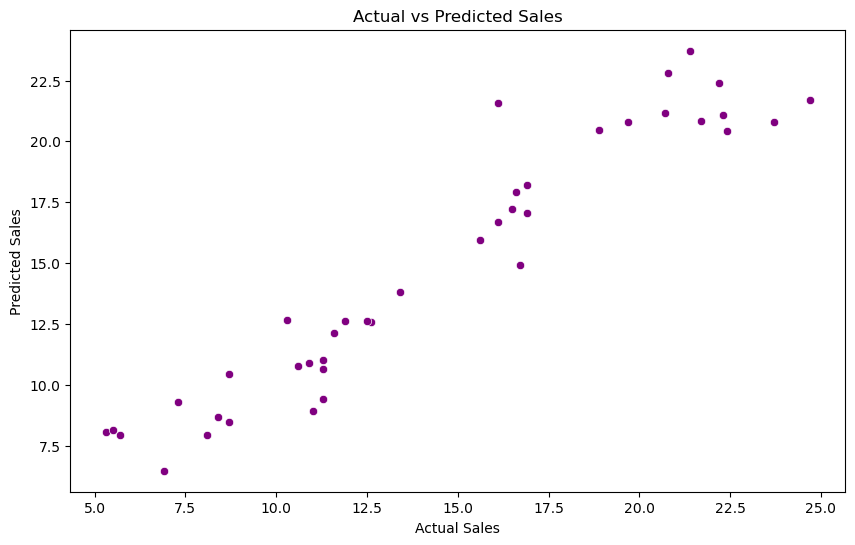

In [7]:
# Plot Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


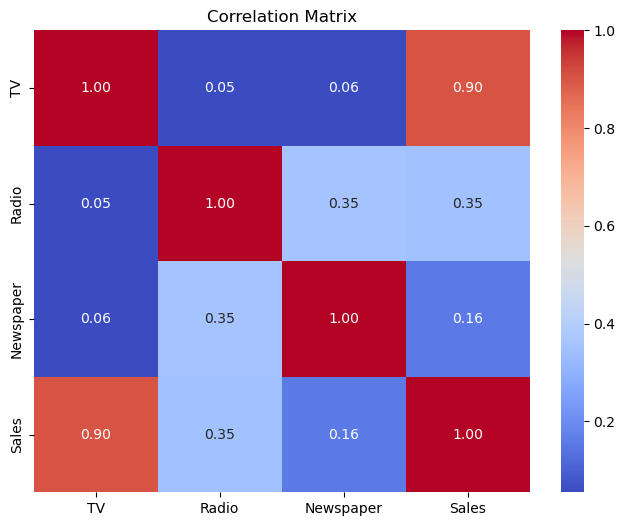

In [8]:
# Compute the correlation matrix
correlation_matrix = advertising_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [9]:
# Create interaction terms
advertising_data['TV_Radio'] = advertising_data['TV'] * advertising_data['Radio']
advertising_data['TV_Newspaper'] = advertising_data['TV'] * advertising_data['Newspaper']
advertising_data['Radio_Newspaper'] = advertising_data['Radio'] * advertising_data['Newspaper']

# Update features
X_interactions = advertising_data[['TV', 'Radio', 'Newspaper', 'TV_Radio', 'TV_Newspaper', 'Radio_Newspaper']]
y = advertising_data['Sales']

# Train-Test Split
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(X_interactions, y, test_size=0.2, random_state=42)

# Train Linear Regression model with interaction terms
model_int = LinearRegression()
model_int.fit(X_train_int, y_train_int)

# Predictions and evaluation
y_pred_int = model_int.predict(X_test_int)
mse_int = mean_squared_error(y_test_int, y_pred_int)
r2_int = r2_score(y_test_int, y_pred_int)

print(f"Mean Squared Error (with interactions): {mse_int:.2f}")
print(f"R-squared (with interactions): {r2_int:.2f}")


Mean Squared Error (with interactions): 2.34
R-squared (with interactions): 0.92


In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Fit the model
poly_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_poly = poly_model.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Mean Squared Error (Polynomial): {mse_poly:.2f}")
print(f"R-squared (Polynomial): {r2_poly:.2f}")


Mean Squared Error (Polynomial): 1.44
R-squared (Polynomial): 0.95


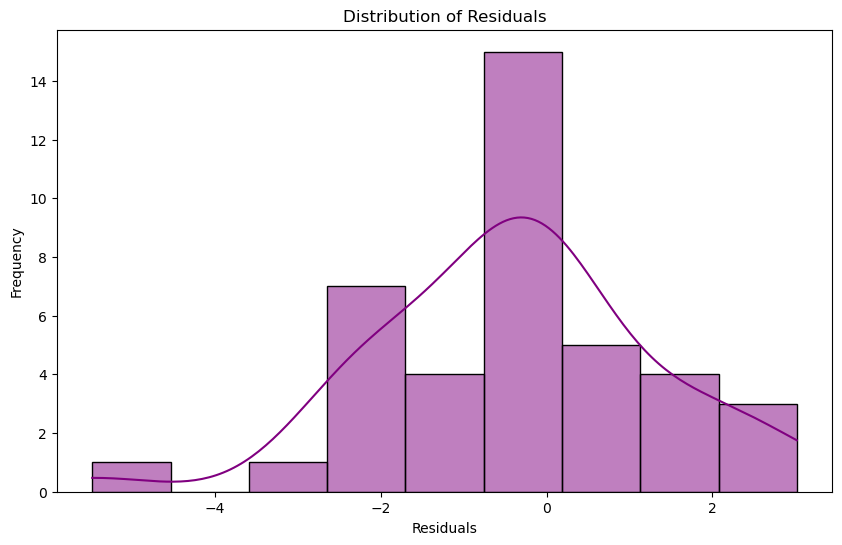

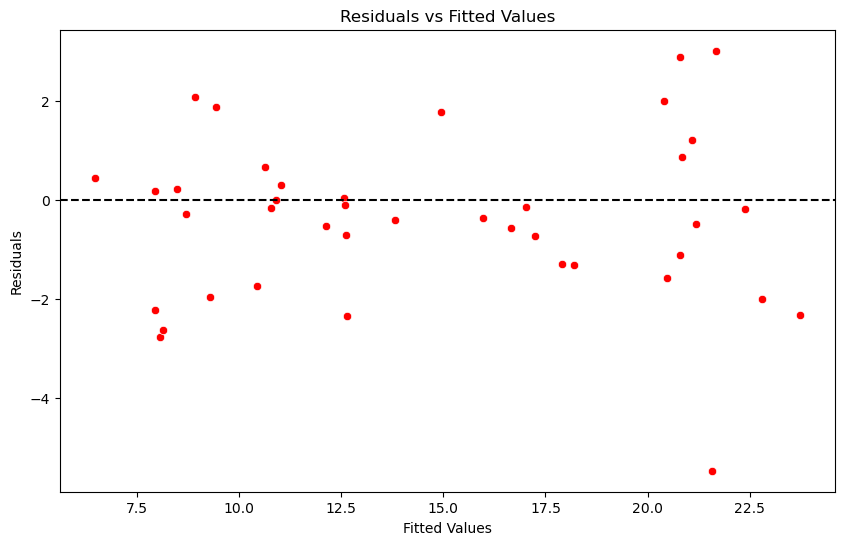

In [11]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residuals vs Fitted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='red')
plt.axhline(0, linestyle='--', color='black')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


In [12]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (Random Forest): {mse_rf:.2f}")
print(f"R-squared (Random Forest): {r2_rf:.2f}")


Mean Squared Error (Random Forest): 1.44
R-squared (Random Forest): 0.95
